## Agentic AI

# Building the Advanced End-to-End RAG Q&A application using the various Data source along with OpenAI AI Agent.


1. Importing the libraries.
2. Creating the first tool to search - Wikipedia
3. Creating the second tool to search - Arvix (scholar articles)
4. Creating the third tool WebBaseLoader to search - Private organization document.
5. Creating the LLM as base to accept our query and searches across with different data source.
6. Organize the entire structure, we're using the AI Agent concept.

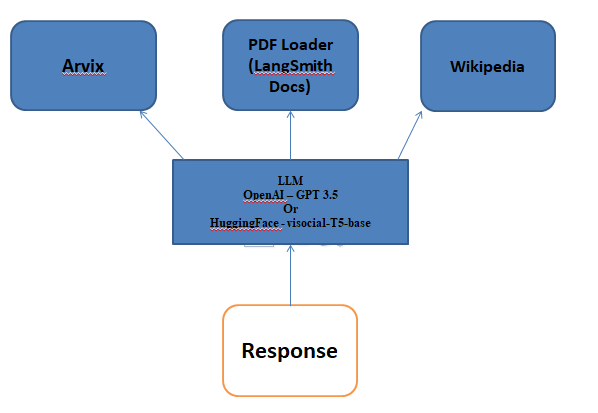

## Installing the LangChain related packages

In [1]:
!pip install arxiv
!pip install wikipedia
!pip install langchain_community
!pip install langchain_openai
!pip install sentence-transformers
!pip install faiss-cpu
!pip install python-dotenv
!pip install langchain-huggingface

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.3 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=e52b559042352626bb68684f020c497cfa512a5e81244db65940e1ff10549b89
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k
  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=cf238ea2206857154c96c5830ed2947cdc9a18822a9baf78c191b1d7359ba116
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install langchain langchain-google-genai google-generativeai

## 1. Creating the First Agent Tool - Wikipedia

Various LangChain built-in tools: https://python.langchain.com/v0.1/docs/integrations/tools/

In [2]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [3]:
api_wrapper=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=200)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper)

## Create the API Call to access the embeddings & to use the LLM Model.

In [ ]:
# DON'T RUN THIS. Setting the env variable for OpenAI Api - Since it costs for each request, we're not use of it.
import os
from google.colab import userdata
sec_key=userdata.get("OPENAI_API_KEY")
os.environ['OPENAI_API_KEY'] = sec_key

In [4]:
import os
os.environ["GOOGLE_API_KEY"] = "your_api_key_here"

## 2. Creating the LangChain tool - To use the protected document.

## Creating the retriever function to extract the data from self document

Using the FAISS Vector DB to store the extracted information from self document.

In [5]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

# Hugging Face Embedding

from langchain.embeddings import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings()


# Gemini Embeddings
# from langchain_google_genai import GoogleGenerativeAIEmbeddings

# # Initialize Gemini embeddings
# embeddings = GoogleGenerativeAIEmbeddings(
#     model="models/embedding-001",  # Gemini embedding model
#     task_type="retrieval_document"
# )

loader=WebBaseLoader("https://docs.smith.langchain.com/")
docs=loader.load()
documents=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200).split_documents(docs)
# OpenAI API is not free to access!! So we're using the HuggingFace Embeddings.
# vectordb=FAISS.from_documents(documents,OpenAIEmbeddings())
vectordb=FAISS.from_documents(documents,embeddings)

# Making the vector db data as retriever to read the contents instead of vector values
retriever=vectordb.as_retriever()
retriever


/tmp/ipython-input-2018247837.py:10: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings()
/tmp/ipython-input-2018247837.py:10: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://hu

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x7d8a482b3d40>, search_kwargs={})

In [8]:
wiki.name

'wikipedia'

## create_retriever_tool - Used to retrieve the data from given protected document and making it as tool now using create_retriever_tool

In [9]:
from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(retriever,"langsmith_search",
                      "Search for information about LangSmith. For any questions about LangSmith, you must use this tool!")

In [10]:
# Debug steps - To test the retriever tool is working or not

docs = retriever.get_relevant_documents("Tell me about prompt engineering") # Q: Tell me about Langsmith
for i, d in enumerate(docs):
    print(f"Doc {i}: {d.page_content}")

Doc 0: Get started by adding tracing to your application.
Create dashboards to view key metrics like RPS, error rates and costs.

Evals‚Äã
The quality and development speed of AI applications depends on high-quality evaluation datasets and metrics to test and optimize your applications on. The LangSmith SDK and UI make building and running high-quality evaluations easy.

Get started by creating your first evaluation.
Quickly assess the performance of your application using our off-the-shelf evaluators as a starting point.
Analyze results of evaluations in the LangSmith UI and compare results over time.
Easily collect human feedback on your data to improve your application.

Prompt Engineering‚Äã
While traditional software applications are built by writing code, AI applications involve writing prompts to instruct the LLM on what to do. LangSmith provides a set of tools designed to enable and facilitate prompt engineering to help you find the perfect prompt for your application.
Doc 1: G

/tmp/ipython-input-2000825805.py:3: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents("Tell me about prompt engineering") # Q: Tell me about Langsmith


In [11]:
retriever_tool.name

'langsmith_search'

## 3. Creating the another Agent tool - Arxiv

Arxiv to read and analyze the scholar & research paper.

In [12]:
## Arxiv Tool
from langchain_community.utilities import ArxivAPIWrapper
from langchain_community.tools import ArxivQueryRun

arxiv_wrapper=ArxivAPIWrapper(top_k_results=1, doc_content_chars_max=200)
arxiv=ArxivQueryRun(api_wrapper=arxiv_wrapper)
arxiv.name

'arxiv'

## Accumulating the all the tools as list to provide with the AI Agent.

In [13]:
tools=[wiki,arxiv,retriever_tool]

In [14]:
tools

[WikipediaQueryRun(api_wrapper=WikipediaAPIWrapper(wiki_client=<module 'wikipedia' from '/usr/local/lib/python3.12/dist-packages/wikipedia/__init__.py'>, top_k_results=1, lang='en', load_all_available_meta=False, doc_content_chars_max=200)),
 ArxivQueryRun(api_wrapper=ArxivAPIWrapper(arxiv_search=<class 'arxiv.Search'>, arxiv_exceptions=(<class 'arxiv.ArxivError'>, <class 'arxiv.UnexpectedEmptyPageError'>, <class 'arxiv.HTTPError'>), top_k_results=1, ARXIV_MAX_QUERY_LENGTH=300, continue_on_failure=False, load_max_docs=100, load_all_available_meta=False, doc_content_chars_max=200)),
 Tool(name='langsmith_search', description='Search for information about LangSmith. For any questions about LangSmith, you must use this tool!', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x7d8a24118cc0>, retriever=VectorStoreRetriever(tags=['FAISS', 'HuggingFaceEmbeddings'], vectorstore=<langchain_community.vectorstores.fa

## Need to creating the prompting template to provide our inputs to search in the LangChain tool.

## Also LangSmith which helps to create the life-cycle of this workflow.

This pulls a predefined prompt from the LangChain Hub, a place where prompts and chains are shared publicly by the LangChain community.

**hwchase17/openai-functions-agent**
which is a system prompt designed specifically for OpenAI function

**Use of this:**
Instead of writing your own system prompt, you:

1. Reuse a well-tested prompt built for OpenAI tools agents.

2. Ensure compatibility with LangChain’s agent system (especially when using tools or function-calling).

3. Speed up development by leveraging shared templates.

**Refer:** https://smith.langchain.com/hub/hwchase17/openai-functions-agent

In [15]:
from langchain import hub
# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

/usr/local/lib/python3.12/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

Not required to run the below one

In [ ]:
langsmith=userdata.get('LANGSMITH_API')
os.environ["LANGCHAIN_API_KEY"] = langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"


from langchain import hub
# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:271: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

## Option 1: OpenAI: Creating the LLM Model using OpenAI - It'll cost us. Don't run this

In [ ]:
from dotenv import load_dotenv

load_dotenv()
import os

from google.colab import userdata
sec_key=userdata.get("OPENAI_API_KEY")
os.environ['OPENAI_API_KEY'] = sec_key

from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0)


## Option 2 : Hugging Face Pipeline Model: Creating the LLM Model using the HuggingFaceHub - It's free of cost to use the LLM -

In [ ]:
from langchain_huggingface import HuggingFacePipeline

In [ ]:
llm = HuggingFacePipeline.from_model_id(
    model_id="5CD-AI/visocial-T5-base",
    task="text2text-generation",
    device=0,  # replace with device_map="auto" to use the accelerate library.
    pipeline_kwargs={"max_new_tokens": 100},
)


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(
Device set to use cuda:0


# Option 3: Gemini LLM Model - Gemini 2.0 flash

In [18]:
# Debug method to know - Gemini Models supports for our API service
from google.colab import userdata
import google.generativeai as genai
sec_key=userdata.get("GEMINI_API")

genai.configure(api_key=sec_key)

models = genai.list_models()
for model in models:
    print(model.name)

models/embedding-gecko-001
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/ge

In [19]:
from langchain_google_genai import ChatGoogleGenerativeAI

# Set your Gemini API key in Colab
import os
sec_key=userdata.get("GEMINI_API")
os.environ["GOOGLE_API_KEY"] = sec_key

llm = ChatGoogleGenerativeAI(model="models/gemini-2.0-flash", temperature=0.2)

# llm.invoke("Tell me about LangSmith")

## Initializing the agent tool & executer - Where it organize LLM, Tools(Arvix, Wiki, self PDF), promptTemplate

In [20]:
from langchain.agents import Tool, initialize_agent
from langchain.agents.agent_types import AgentType

agent_executor = initialize_agent(
    tools=tools,
    llm=llm,  # your Gemini or HuggingFace LLM
    agent=AgentType.OPENAI_FUNCTIONS,  # or AgentType.OPENAI_FUNCTIONS for Gemini
    verbose=True,
)

# response = agent_executor.invoke({"input": "Tell me about Langsmith"})
response = agent_executor.invoke({
    "input": "Tell me about Langsmith"
})

print(response)


/tmp/ipython-input-2703229877.py:4: LangChainDeprecationWarning: LangChain agents will continue to be supported, but it is recommended for new use cases to be built with LangGraph. LangGraph offers a more flexible and full-featured framework for building agents, including support for tool-calling, persistence of state, and human-in-the-loop workflows. For details, refer to the `LangGraph documentation <https://langchain-ai.github.io/langgraph/>`_ as well as guides for `Migrating from AgentExecutor <https://python.langchain.com/docs/how_to/migrate_agent/>`_ and LangGraph's `Pre-built ReAct agent <https://langchain-ai.github.io/langgraph/how-tos/create-react-agent/>`_.
  agent_executor = initialize_agent(




> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'Langsmith'}`


Get started with LangSmith | ü¶úÔ∏èüõ†Ô∏è LangSmith

LangSmith + LangChain OSSLangSmith is framework-agnostic ‚Äî¬†it can be used with or without LangChain's open source frameworks langchain and langgraph.If you are using either of these, you can enable LangSmith tracing with a single environment variable.
For more see the how-to guide for setting up LangSmith with LangChain or setting up LangSmith with LangGraph.
Observability‚Äã
Observability is important for any software application, but especially so for LLM applications. LLMs are non-deterministic by nature, meaning they can produce unexpected results. This makes them trickier than normal to debug.
This is where LangSmith can help! LangSmith has LLM-native observability, allowing you to get meaningful insights from your application. LangSmith‚Äôs observability features have you covered throughout all stages of application develo

## Here you can invoke your question and get the response from the respective tools.

If the question relavant to,

1. "Langsmith document" - Retriever tool will extract the content and will give to llm to generate the content

2. "Common question related to wiki" - Wiki tool will extract the content and will give to llm to generate the content

1. "Published paper content" - Arvix tool will extract the content and will give to llm to generate the content

## Example for various agent: https://python.langchain.com/v0.1/docs/modules/agents/

In [21]:
# Your agent understand the question and taking into to langsmith_search search
agent_executor.invoke({"input":"Tell me about Langsmith"})



> Entering new AgentExecutor chain...

Invoking: `langsmith_search` with `{'query': 'Tell me about Langsmith'}`


Get started with LangSmith | ü¶úÔ∏èüõ†Ô∏è LangSmith

LangSmith + LangChain OSSLangSmith is framework-agnostic ‚Äî¬†it can be used with or without LangChain's open source frameworks langchain and langgraph.If you are using either of these, you can enable LangSmith tracing with a single environment variable.
For more see the how-to guide for setting up LangSmith with LangChain or setting up LangSmith with LangGraph.
Observability‚Äã
Observability is important for any software application, but especially so for LLM applications. LLMs are non-deterministic by nature, meaning they can produce unexpected results. This makes them trickier than normal to debug.
This is where LangSmith can help! LangSmith has LLM-native observability, allowing you to get meaningful insights from your application. LangSmith‚Äôs observability features have you covered throughout all stages of appl

{'input': 'Tell me about Langsmith',
 'output': "LangSmith is a platform designed for building production-grade LLM applications. It provides tools for observability, evaluation, and prompt engineering, allowing you to monitor, analyze, and improve your applications. It is framework-agnostic and can be used with or without LangChain's open source frameworks. Key features include:\n\n*   **Observability:** LLM-native observability to gain insights from your application, with features covering prototyping, beta testing, and production. Analyze traces, configure metrics, dashboards, and alerts.\n*   **Evaluation:** Tools to build and run high-quality evaluations, assess application performance, get human feedback, and compare results over time.\n*   **Prompt Engineering:** Features for iterating on prompts, with automatic version control and collaboration tools."}

In [22]:
# Your agent understand the question and taking into to wikipedia search
agent_executor.invoke({"input":"What is the indian flag color?"})



> Entering new AgentExecutor chain...

Invoking: `wikipedia` with `{'query': 'Indian flag colors'}`


Page: Flag of India
Summary: The national flag of India, colloquially called Tiraṅgā (the tricolour), is a horizontal rectangular tricolour flag, the colours being of India saffron, white and India grThe Indian flag is a horizontal rectangular tricolour flag with the colours India saffron, white, and India green.

> Finished chain.


{'input': 'What is the indian flag color?',
 'output': 'The Indian flag is a horizontal rectangular tricolour flag with the colours India saffron, white, and India green.'}

In [23]:
# Your agent understand the question and taking into to arvix search
agent_executor.invoke({"input":"What's the paper 1605.08386 about?"})



> Entering new AgentExecutor chain...

Invoking: `arxiv` with `{'query': '1605.08386'}`


Published: 2016-05-26
Title: Heat-bath random walks with Markov bases
Authors: Caprice Stanley, Tobias Windisch
Summary: Graphs on lattice points are studied whose edges come from a finite set of
alloThe paper 1605.08386, titled "Heat-bath random walks with Markov bases," was published on 2016-05-26. It is authored by Caprice Stanley and Tobias Windisch. The paper studies graphs on lattice points whose edges come from a finite set of allo.

> Finished chain.


{'input': "What's the paper 1605.08386 about?",
 'output': 'The paper 1605.08386, titled "Heat-bath random walks with Markov bases," was published on 2016-05-26. It is authored by Caprice Stanley and Tobias Windisch. The paper studies graphs on lattice points whose edges come from a finite set of allo.'}